# Ex1 - Concentration Inequalities (Question 2.2)
---

Handle imports

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 12,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

generate the dataset: 100000 sequences of 1000 coin tosses

In [25]:
SEQUENCES = 100000
TOSSES = 1000

# p-coin
p = 0.25

# epsilon values for the next questions
epsilons = [0.5,0.25,0.1,0.01,0.001]

# used as the x axis for the plots (1,...,TOSSES)
m = np.arange(TOSSES)+1

In [26]:
data = np.random.binomial(1, p, (SEQUENCES, TOSSES))
print(f"shape: {data.shape}")
print(data)

shape: (100000, 1000)
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 1 1]]


### (a) - Defining the Estimation
For the first 5 sequences of 1000 tosses (the first 5 rows in “data”), plot the estimate
$\overline{X}_m$ as a function of m (i.e the mean of all tosses up to $m$). 1 figure with 5
plots (each row in a different color). What do you expect to see in this plot as $m$ grows?


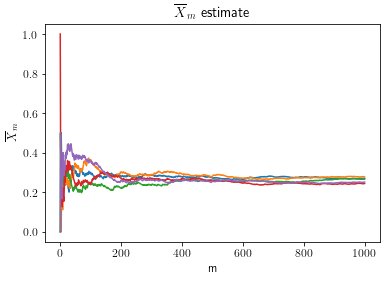

In [27]:
ESTIMATION_SET_SIZE = 5
EPS_LEN = len(epsilons)

# run the estimation on a ESTIMATION_SIZE sequences of the dataset
estimations = data[:ESTIMATION_SET_SIZE,:].cumsum(axis=1) / m

# plot estimations for every sequence of the first ESTIMATION_SIZE sequences
plt.figure()
for estimation in estimations:
    plt.plot(m, estimation)

plt.title(r'$\overline{X}_m$ estimate')
plt.xlabel('m')
plt.ylabel(r'$\overline{X}_m$')
plt.show()

## Answer
___

__(a).__ As stated by the law of large numbers, the larger the sample size ($m$), the closer the
average ($\overline{X}_m$) will be to actual mean of the coin - which seems to be roughly $\frac{1}{4}$.
We can clearly see the value of each of the sequences converging to the same value, which corresponds, as expected,
to the fact all sequences were created using the same "coin".

### (b)&(c) Upper and actual bounds
(b). For each bound (Chebyshev and Hoeffding seen in class) and for each ε, plot the upper
bound on $\mathbb{P}(|\overline{X}_m-\mathbb{E}[X]|≥\epsilon)$ (derived in class) as a function of m (where m
ranges from 1 to 1000). 5 figures with 2 plots each (mention in the title of each plot what
is `ε` and use a different color for each bound)

(c). You are now told that $p = 0.25$. On top of the figures from the previous question, plot
the percentage of sequences that satisfy  $|\overline{X}_m-\mathbb{E}[X]|≥\epsilon$ as a function of m (now you
know $\mathbb{E}[X] = p = 0.25$). What are you expecting to see in these plots? Explain

In [28]:
chebyshev = lambda n,e: min(1/(4*n*(e**2)),1)
hoeffding = lambda n,e: min(2*np.exp(-2*n*(e**2)),1)

deltas = np.abs((data.cumsum(axis=1) / m)-p)

fig, axs = plt.subplots(3, 2, figsize=(15,15), edgecolor="#e4e6e8", constrained_layout=True)
for j, eps in enumerate(epsilons):
    ax = axs[int(j/2),(j%2)]
    percentage = np.sum((deltas >= eps), axis=0) / SEQUENCES

    ax.plot(m, [chebyshev(i, eps) for i in m], label='chebyshev')
    ax.plot(m, [hoeffding(i, eps) for i in m], label='hoeffding')
    ax.scatter(m, percentage, marker='.',label="percentage", edgecolors='red', alpha=0.5)

    ax.legend()
    ax.set_xlabel("m")
    ax.set_ylabel("satisfied sequences (\%) / upper bound ")
    ax.set_title(r'$|\overline{X}_m-\mathbb{E}[X]|\geq ' + str(eps) + '$', fontsize=16)

fig.delaxes(axs[2, 1])
fig.suptitle("Upper\&actual bounds", fontsize=16)
plt.show()

MemoryError: Unable to allocate 763. MiB for an array with shape (100000, 1000) and data type float64

## Answers:
___

__(b).__  Since we know the dataset is of some p-biased coin:
 $X_i{\sim}Ber(p)\, \Rightarrow Var(X_i)=p\cdot(1-p) \leq \frac{1}{4}$.
 Therefore, we can now analytically calculate both upper bound - Chebyshev's and Hoeffding's,
 as shown in the recitation.

__(c).__ Now that we know as a matter of fact $\mathbb{E}[X]=0.25$, I was expecting to see the plots converging to the value $0$
as $m$ grows larger, while also the larger the epsilon value is, the faster the plot will converge to 0 -
meaning almost all the computed $\overline{X}_m$ sequences values (estimated means) are in the epsilon range of the actual mean.
So we can see as a matter of fact:
$$\forall\epsilon>0\ \lim_{m \to \infty}\mathbb{P}(|\overline{X}_m-\mathbb{E}(X)|>\epsilon)=0$$
Exactly as stated by the law of large numbers.
